# SONM active deal analyzer

## This notebook is to analyze active deals on the SONM platform in real-time.

### Import necessary libraries

In [217]:
import pandas as pd
import numpy as np

In [218]:
import seaborn as sns

### ipython magic to plot in a notebook

In [219]:
%matplotlib inline

### SONM's DWH spits out API information of active deals.  Using Jupyter's magic to run BASH command to save the API data to livedeal.txt

In [220]:
!curl -s https://dwh.livenet.sonm.com:15022/DWHServer/GetDeals/ -d '{"status":1}' > livedeal.txt

### Open the saved text in Jupyter

In [221]:
f = open('livedeal.txt','r')

### Convert opened file to Pandas dataframe.

In [222]:
k = f.readlines()

In [223]:
r = k[0].split(',')

In [224]:
headposition = []
i = 0
for item in r:
    if 'deal' in item:

        headposition.append(i)
    i = i+1

In [225]:
testlist = []
for i in range(len(headposition)):
    if headposition[i]>0:
        #print(headposition[i-1], headposition[i])
        #print(r[headposition[i-1] : headposition[i]])
        testlist.append(r[headposition[i-1] : headposition[i]])

In [226]:
df = pd.DataFrame(testlist)

In [227]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,"{""deals"":[{""deal"":{""id"":""6390""","""benchmarks"":{""values"":[103",1300,2,512000000,67108864,1000000,1000000,7,8511291392,...,"""status"":1","""blockedBalance"":""2842823228530779051""","""totalPayout"":""31552468860899037944""","""lastBillTS"":""2018-09-07T22:26:20Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ND...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None
1,"{""deal"":{""id"":""6421""","""benchmarks"":{""values"":[104",1943,16,512000000,67108864,1000000,1000000,4,6372196352,...,"""status"":1","""blockedBalance"":""1180830042563352124""","""totalPayout"":""3535161108458628344""","""lastBillTS"":""2018-09-07T22:25:32Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NG...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None
2,"{""deal"":{""id"":""3457""","""benchmarks"":{""values"":[1004",513,6,256000000,67108864,1000000,1000000,0,0,...,"""status"":1","""blockedBalance"":""1776104355885276""","""totalPayout"":""1246167125518822294""","""lastBillTS"":""2018-09-07T22:20:02Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None
3,"{""deal"":{""id"":""6420""","""benchmarks"":{""values"":[10003",1943,16,256000000,67108864,12000,0,0,0,...,"""status"":1","""blockedBalance"":""2000945975167003""","""totalPayout"":""6290701151818712""","""lastBillTS"":""2018-09-07T22:17:53Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NG...","""consumerCertificates"":""W10=""}",None
4,"{""deal"":{""id"":""3458""","""benchmarks"":{""values"":[1002",538,8,256000000,67108864,1000000,1000000,0,0,...,"""status"":1","""blockedBalance"":""1776104355885276""","""totalPayout"":""1246040040558694570""","""lastBillTS"":""2018-09-07T22:15:47Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None


## Data Cleaning

### The 14 column contains consumer ID.  First clean this colum.

In [228]:
df[14]

0     "consumerID":"0x417c92FbD944b125A578848DE44a4F...
1     "consumerID":"0x417c92FbD944b125A578848DE44a4F...
2     "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
3     "consumerID":"0xeFe1976D528FdeAC56E09115462dDe...
4     "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
5     "consumerID":"0x417c92FbD944b125A578848DE44a4F...
6     "consumerID":"0xedB7Ae4B946Cf249349974A02e354B...
7     "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
8     "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
9     "consumerID":"0x49f6C95B97C209F814c5b3B13428E9...
10    "consumerID":"0xeFe1976D528FdeAC56E09115462dDe...
11    "consumerID":"0x417c92FbD944b125A578848DE44a4F...
12    "consumerID":"0x35f286b2472A99Eb011ff349b2b33f...
13    "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
14    "consumerID":"0xeFe1976D528FdeAC56E09115462dDe...
15    "consumerID":"0xE75Bba413A645d0b6fB851b969fE03...
16    "consumerID":"0x417c92FbD944b125A578848DE44a4F...
17    "consumerID":"0xeFe1976D528FdeAC56E0911546

### Make a little funtion to trim unnecessary charactors

In [229]:
def Supplier_ID_conversion(content):
    return content[14:-1]

###  And applyt to pandas data frame.  New column called consumer_ID is generated.

In [230]:
df['consumer_ID'] = df[14].apply(Supplier_ID_conversion)

In [231]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,consumer_ID
0,"{""deals"":[{""deal"":{""id"":""6390""","""benchmarks"":{""values"":[103",1300,2,512000000,67108864,1000000,1000000,7,8511291392,...,"""blockedBalance"":""2842823228530779051""","""totalPayout"":""31552468860899037944""","""lastBillTS"":""2018-09-07T22:26:20Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ND...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911
1,"{""deal"":{""id"":""6421""","""benchmarks"":{""values"":[104",1943,16,512000000,67108864,1000000,1000000,4,6372196352,...,"""blockedBalance"":""1180830042563352124""","""totalPayout"":""3535161108458628344""","""lastBillTS"":""2018-09-07T22:25:32Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NG...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911
2,"{""deal"":{""id"":""3457""","""benchmarks"":{""values"":[1004",513,6,256000000,67108864,1000000,1000000,0,0,...,"""blockedBalance"":""1776104355885276""","""totalPayout"":""1246167125518822294""","""lastBillTS"":""2018-09-07T22:20:02Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb
3,"{""deal"":{""id"":""6420""","""benchmarks"":{""values"":[10003",1943,16,256000000,67108864,12000,0,0,0,...,"""blockedBalance"":""2000945975167003""","""totalPayout"":""6290701151818712""","""lastBillTS"":""2018-09-07T22:17:53Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NG...","""consumerCertificates"":""W10=""}",None,0xeFe1976D528FdeAC56E09115462dDedB26254BF7
4,"{""deal"":{""id"":""3458""","""benchmarks"":{""values"":[1002",538,8,256000000,67108864,1000000,1000000,0,0,...,"""blockedBalance"":""1776104355885276""","""totalPayout"":""1246040040558694570""","""lastBillTS"":""2018-09-07T22:15:47Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb


## supplier

###  Same trick for the supplier ID.  The 13 column contains supplier ID information.  Clean with the same function.

In [232]:
df[13]

0     "supplierID":"0xd8B606a3D19C53E6Eea84ca5738D7D...
1     "supplierID":"0xA0885038D127f628B3DC7f406004dE...
2     "supplierID":"0x8546601F9b4AcF1dc99C72cc48ED24...
3     "supplierID":"0xA0885038D127f628B3DC7f406004dE...
4     "supplierID":"0x7Cc1C96E6c20D6265531196d9ca2b3...
5     "supplierID":"0x4FC67349467228BF3e57A8eaAf135D...
6     "supplierID":"0xc364C71bAFAA85671C4d45E5Cf61bf...
7     "supplierID":"0x1a5d1841078be8d8f2b54D4F326443...
8     "supplierID":"0xaE7DB91DeC00E3Be062C7dC3328859...
9     "supplierID":"0xAe4fD4581D82C615105c798c73d1C3...
10    "supplierID":"0x70eC78FAF2CcD3fA3fe9567Fa5B835...
11    "supplierID":"0x0c750db3cB057A8D5034881d95ea4E...
12    "supplierID":"0x8015Cb7EDb97c352b8e10a7E4d8762...
13    "supplierID":"0x672Ee945a55327328472B1a0243729...
14    "supplierID":"0x9cac32fE29923Fa801665FBFd7968E...
15    "supplierID":"0xEEBc720552B116A8C3bAF4AaeCf762...
16    "supplierID":"0xEEBc720552B116A8C3bAF4AaeCf762...
17    "supplierID":"0xBc5387d617D2F1Dde5Dbd01b57

In [233]:
df['supplier_ID'] = df[13].apply(Supplier_ID_conversion)

### Price

### Price value is shown as USD/s, so conver it to USD/h

In [234]:
unit = 10.0**18.0

4830442500000/unit * 60 *60

In [235]:
def Price_conversion(content):
    if 'price' in content:
        return float(content[9:-1])/unit * 60 *60
    if 'duration' in content:
        return float(content[11:-1])/unit * 60 * 60

In [236]:
df['price_USD/h'] = df[18].apply(Price_conversion)

###  ETH has rate

### The 10 column contains Ethash value.  Clean and convert to Mh/s.

In [237]:
df[10]

0     186283000
1      79298000
2             0
3             0
4             0
5     173183000
6             0
7     205768000
8             0
9             0
10            0
11    172031000
12    141723000
13    186411000
14            0
15     32463000
16     26665000
17            0
18     19874000
19    186366000
20     19778000
21            0
22     22428000
23    186198000
24            0
25            0
26            0
27            0
28     21959000
29            0
30     19806000
31            0
32     22519000
33     48544000
34            0
35            0
36            0
37            0
38            0
39            0
40            0
41            0
Name: 10, dtype: object

In [238]:
float(df[10][0])/1000000

186.283

In [239]:
def Ethash_conversion(content):
    return float(content)/1000000

In [240]:
Ethash_conversion(df[10][0])

186.283

In [241]:
df['Ethash'] = df[10].apply(Ethash_conversion)

In [242]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,consumer_ID,supplier_ID,price_USD/h,Ethash
0,"{""deals"":[{""deal"":{""id"":""6390""","""benchmarks"":{""values"":[103",1300,2,512000000,67108864,1000000,1000000,7,8511291392,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ND...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,0.136195,186.283
1,"{""deal"":{""id"":""6421""","""benchmarks"":{""values"":[104",1943,16,512000000,67108864,1000000,1000000,4,6372196352,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NG...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xA0885038D127f628B3DC7f406004dE104d0bF496,0.056235,79.298
2,"{""deal"":{""id"":""3457""","""benchmarks"":{""values"":[1004",513,6,256000000,67108864,1000000,1000000,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x8546601F9b4AcF1dc99C72cc48ED243d119cca95,0.000100,0.000
3,"{""deal"":{""id"":""6420""","""benchmarks"":{""values"":[10003",1943,16,256000000,67108864,12000,0,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NG...","""consumerCertificates"":""W10=""}",None,0xeFe1976D528FdeAC56E09115462dDedB26254BF7,0xA0885038D127f628B3DC7f406004dE104d0bF496,0.000100,0.000
4,"{""deal"":{""id"":""3458""","""benchmarks"":{""values"":[1002",538,8,256000000,67108864,1000000,1000000,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x7Cc1C96E6c20D6265531196d9ca2b3199fF8Ef9E,0.000100,0.000


##  master ID

In [243]:
def Master_ID_conversion(content):
    return content[12:-1]

In [244]:
df['master_ID'] =  df[15].apply(Master_ID_conversion)

# Run statistics for suppliers

In [245]:
df.groupby('supplier_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
supplier_ID,,,,,,,,
0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,1.0,172.0310,NaN,172.031,172.03100,172.0310,172.03100,172.031
0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,1.0,186.3660,NaN,186.366,186.36600,186.3660,186.36600,186.366
0x1A46613006bCACCA13b27B3b317edA65D726ef6b,1.0,19.8060,NaN,19.806,19.80600,19.8060,19.80600,19.806
0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,1.0,21.9590,NaN,21.959,21.95900,21.9590,21.95900,21.959
0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,1.0,205.7680,NaN,205.768,205.76800,205.7680,205.76800,205.768
0x26d44146aaD7a8A1230c8f03Edb50eE5EEAFe6ce,1.0,0.0000,NaN,0.000,0.00000,0.0000,0.00000,0.000
0x323FB5f356088ae979F12f27f94013e449BC62df,1.0,0.0000,NaN,0.000,0.00000,0.0000,0.00000,0.000
0x4023A8e997C09f97DA89aaB99AC7C5A93A9d1c49,2.0,22.4735,0.064347,22.428,22.45075,22.4735,22.49625,22.519
0x47012859fC5cB44d6106D54ff77580c85C380ecc,1.0,48.5440,NaN,48.544,48.54400,48.5440,48.54400,48.544


In [246]:
df10 = df.groupby('supplier_ID').describe()['Ethash']

In [247]:
df10.to_csv('eth.csv')

In [248]:
df11 = pd.read_csv('eth.csv')

In [249]:
df11['total_Ethash']= df11['count']*df11['mean']

In [250]:
df11[['supplier_ID','total_Ethash','count']]

,supplier_ID,total_Ethash,count
0,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,172.031,1.0
1,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,186.366,1.0
2,0x1A46613006bCACCA13b27B3b317edA65D726ef6b,19.806,1.0
3,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,21.959,1.0
4,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,205.768,1.0
5,0x26d44146aaD7a8A1230c8f03Edb50eE5EEAFe6ce,0.000,1.0
6,0x323FB5f356088ae979F12f27f94013e449BC62df,0.000,1.0
7,0x4023A8e997C09f97DA89aaB99AC7C5A93A9d1c49,44.947,2.0
8,0x47012859fC5cB44d6106D54ff77580c85C380ecc,48.544,1.0
9,0x4FC67349467228BF3e57A8eaAf135D93C3558239,173.183,1.0


In [251]:
df11[['supplier_ID','total_Ethash','count']].sort_values('total_Ethash', ascending = False)

,supplier_ID,total_Ethash,count
4,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,205.768,1.0
11,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0
1,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,186.366,1.0
33,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,186.283,1.0
10,0x62F5A3B4E867a9AB981201EbFA9A6FEA8dc22007,186.198,1.0
9,0x4FC67349467228BF3e57A8eaAf135D93C3558239,173.183,1.0
0,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,172.031,1.0
15,0x8015Cb7EDb97c352b8e10a7E4d87623B5A8230CD,141.723,1.0
21,0xA0885038D127f628B3DC7f406004dE104d0bF496,79.298,2.0
27,0xEEBc720552B116A8C3bAF4AaeCf762A45254814a,59.128,2.0


In [252]:
df12 = df11[['supplier_ID','total_Ethash','count']].sort_values('total_Ethash', ascending = False)

In [253]:
df12.to_csv('ethash.csv', index = False)

In [254]:
df13 = pd.read_csv('ethash.csv')

In [255]:
df13

,supplier_ID,total_Ethash,count
0,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,205.768,1.0
1,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0
2,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,186.366,1.0
3,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,186.283,1.0
4,0x62F5A3B4E867a9AB981201EbFA9A6FEA8dc22007,186.198,1.0
5,0x4FC67349467228BF3e57A8eaAf135D93C3558239,173.183,1.0
6,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,172.031,1.0
7,0x8015Cb7EDb97c352b8e10a7E4d87623B5A8230CD,141.723,1.0
8,0xA0885038D127f628B3DC7f406004dE104d0bF496,79.298,2.0
9,0xEEBc720552B116A8C3bAF4AaeCf762A45254814a,59.128,2.0


In [256]:
df13['total_Ethash'].sum()

1751.297

In [257]:
print('Real-time total Ethash rate of the entire SONM platform is '+ str(df13['total_Ethash'].sum()) +' Mh/s')

Real-time total Ethash rate of the entire SONM platform is 1751.297 Mh/s


## supplier's revenue

In [258]:
df13['supplier_ID'][0]

'0x1a5d1841078be8d8f2b54D4F3264438a69e94C94'

In [259]:
df[df.supplier_ID == df13['supplier_ID'][0]]['price_USD/h'].sum()

0.16462080000000001

In [260]:
def total_revenue(address):
    return df[df.supplier_ID == address]['price_USD/h'].sum()

In [261]:
total_revenue(df13['supplier_ID'][0])

0.16462080000000001

In [262]:
df13['total_revenue_USD/h'] = df13['supplier_ID'].apply(total_revenue)

In [263]:
df13.dtypes

supplier_ID             object
total_Ethash           float64
count                  float64
total_revenue_USD/h    float64
dtype: object

In [264]:
df13['total_revenue_USD/d'] = df13['total_revenue_USD/h'] *24

In [265]:
df13['revenue_USD/d'] = df13['total_revenue_USD/d'].map('${:,.2f}'.format)

In [266]:
df13.head()

,supplier_ID,total_Ethash,count,total_revenue_USD/h,total_revenue_USD/d,revenue_USD/d
0,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,205.768,1.0,0.164621,3.950899,$3.95
1,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0,0.175356,4.208554,$4.21
2,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,186.366,1.0,0.178736,4.289659,$4.29
3,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,186.283,1.0,0.136195,3.268683,$3.27
4,0x62F5A3B4E867a9AB981201EbFA9A6FEA8dc22007,186.198,1.0,0.177844,4.268256,$4.27


In [267]:
sns.set()

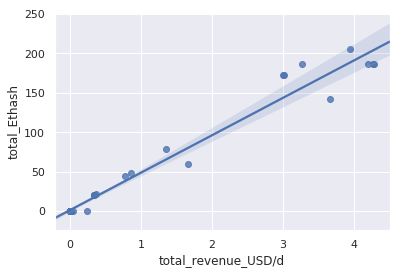

In [268]:
sns.regplot(y="total_Ethash", x="total_revenue_USD/d", data=df13)

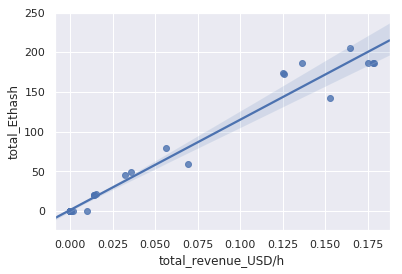

In [269]:
sns.regplot(y="total_Ethash", x="total_revenue_USD/h", data=df13)

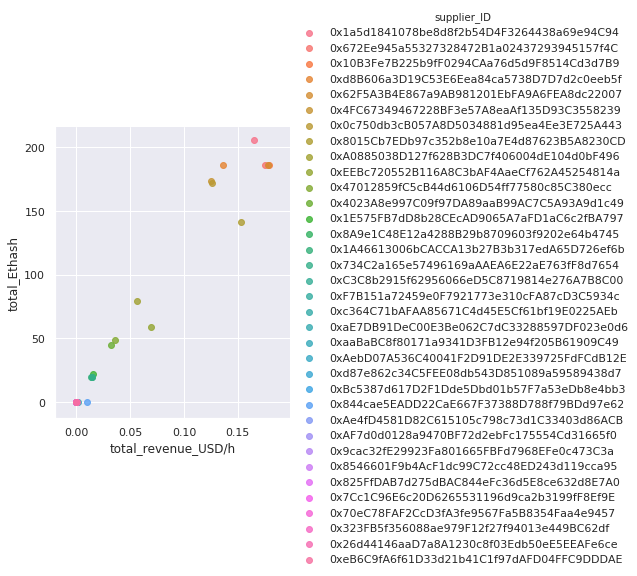

In [270]:
sns.lmplot( y="total_Ethash", x="total_revenue_USD/h", data=df13, fit_reg=False, hue='supplier_ID', legend=True)

In [271]:
df13[['supplier_ID','total_Ethash','count','revenue_USD/d']]

,supplier_ID,total_Ethash,count,revenue_USD/d
0,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,205.768,1.0,$3.95
1,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0,$4.21
2,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,186.366,1.0,$4.29
3,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,186.283,1.0,$3.27
4,0x62F5A3B4E867a9AB981201EbFA9A6FEA8dc22007,186.198,1.0,$4.27
5,0x4FC67349467228BF3e57A8eaAf135D93C3558239,173.183,1.0,$3.01
6,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,172.031,1.0,$3.01
7,0x8015Cb7EDb97c352b8e10a7E4d87623B5A8230CD,141.723,1.0,$3.67
8,0xA0885038D127f628B3DC7f406004dE104d0bF496,79.298,2.0,$1.35
9,0xEEBc720552B116A8C3bAF4AaeCf762A45254814a,59.128,2.0,$1.66


In [272]:
df13['total_revenue_USD/d'].sum()

36.05529352106376

In [273]:
df13['total_revenue_USD/d'].sum()

36.05529352106376

In [274]:
"{:.2f}".format(df13['total_revenue_USD/d'].sum())

'36.06'

In [275]:
print('At this moment, total ' + str("{:.2f}".format(df13['total_revenue_USD/d'].sum())) + ' USD/day is spent on the entire SONM platform.')

At this moment, total 36.06 USD/day is spent on the entire SONM platform.


# Run the same statistics for master_ID

In [276]:
df.groupby('master_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
master_ID,,,,,,,,
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,1.0,205.768000,NaN,205.768,205.76800,205.7680,205.76800,205.768
0x1bC66B0374C997cF9CB087Ef184975f174c053b5,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000
0x25158E6f8dD683d222E3785BA2294A319489084E,1.0,48.544000,NaN,48.544,48.54400,48.5440,48.54400,48.544
0x257308430e87b7E45816Bda27DC76cbF739fCD30,2.0,22.473500,0.064347,22.428,22.45075,22.4735,22.49625,22.519
0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,1.0,141.723000,NaN,141.723,141.72300,141.7230,141.72300,141.723
0x3C63D359D86E6165a2eBe911caA822d90e85432C,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000
0x416Af57F633e292b25976573a460d7C3200feD34,4.0,186.314500,0.094037,186.198,186.26175,186.3245,186.37725,186.411
0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,6.0,19.829667,30.711992,0.000,0.00000,9.9030,19.85700,79.298
0x6F6B9a47668D96b3758D79c67c30A290934a759F,1.0,19.778000,NaN,19.778,19.77800,19.7780,19.77800,19.778


In [277]:
df20 = df.groupby('master_ID').describe()['Ethash']

In [278]:
df20.to_csv('mastereth.csv')

In [279]:
df21 = pd.read_csv('mastereth.csv')

In [280]:
df21['total_Ethash']= df21['count']*df21['mean']

In [281]:
df21.head()

,master_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash
0,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,1.0,205.7680,NaN,205.768,205.76800,205.7680,205.76800,205.768,205.768
1,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,1.0,0.0000,NaN,0.000,0.00000,0.0000,0.00000,0.000,0.000
2,0x25158E6f8dD683d222E3785BA2294A319489084E,1.0,48.5440,NaN,48.544,48.54400,48.5440,48.54400,48.544,48.544
3,0x257308430e87b7E45816Bda27DC76cbF739fCD30,2.0,22.4735,0.064347,22.428,22.45075,22.4735,22.49625,22.519,44.947
4,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,1.0,141.7230,NaN,141.723,141.72300,141.7230,141.72300,141.723,141.723


In [282]:
df21[['master_ID','total_Ethash','count']]

,master_ID,total_Ethash,count
0,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,205.768,1.0
1,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,0.000,1.0
2,0x25158E6f8dD683d222E3785BA2294A319489084E,48.544,1.0
3,0x257308430e87b7E45816Bda27DC76cbF739fCD30,44.947,2.0
4,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,141.723,1.0
5,0x3C63D359D86E6165a2eBe911caA822d90e85432C,0.000,1.0
6,0x416Af57F633e292b25976573a460d7C3200feD34,745.258,4.0
7,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,118.978,6.0
8,0x6F6B9a47668D96b3758D79c67c30A290934a759F,19.778,1.0
9,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,0.000,1.0


In [283]:
df22 = df21[['master_ID','total_Ethash','count']].sort_values('total_Ethash', ascending = False)

In [284]:
df22.head()

,master_ID,total_Ethash,count
6,0x416Af57F633e292b25976573a460d7C3200feD34,745.258,4.0
14,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,345.214,2.0
0,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,205.768,1.0
4,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,141.723,1.0
7,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,118.978,6.0


In [285]:
df22.to_csv('masterethash.csv', index = False)

In [286]:
df23 = pd.read_csv('masterethash.csv')

In [287]:
df23

,master_ID,total_Ethash,count
0,0x416Af57F633e292b25976573a460d7C3200feD34,745.258,4.0
1,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,345.214,2.0
2,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,205.768,1.0
3,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,141.723,1.0
4,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,118.978,6.0
5,0x7610dd9944615263d9858101Dd197C90255DBa93,59.128,3.0
6,0x25158E6f8dD683d222E3785BA2294A319489084E,48.544,1.0
7,0x257308430e87b7E45816Bda27DC76cbF739fCD30,44.947,2.0
8,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,21.959,1.0
9,0x6F6B9a47668D96b3758D79c67c30A290934a759F,19.778,1.0


In [288]:
def total_master_revenue(address):
    return df[df.master_ID == address]['price_USD/h'].sum()

In [289]:
df23['total_revenue_USD/h'] = df23['master_ID'].apply(total_master_revenue)

In [290]:
df23['total_revenue_USD/d'] = df23['total_revenue_USD/h'] *24

In [291]:
df23['revenue_USD/d'] = df23['total_revenue_USD/d'].map('${:,.2f}'.format)

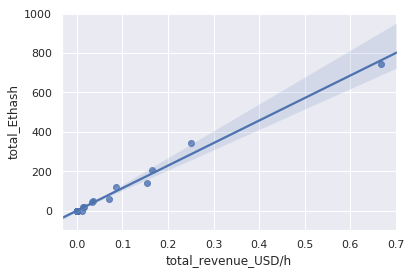

In [292]:
sns.regplot(y="total_Ethash", x="total_revenue_USD/h", data=df23)

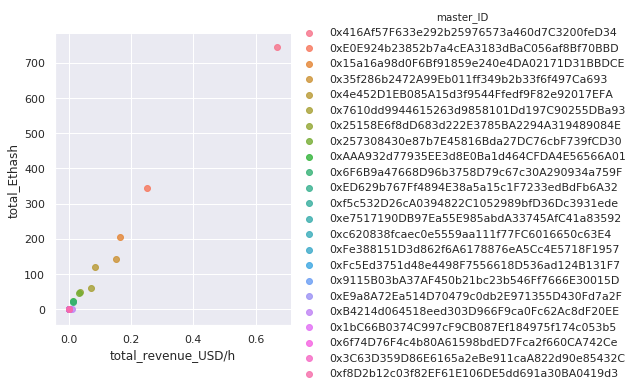

In [293]:
sns.lmplot( y="total_Ethash", x="total_revenue_USD/h", data=df23, fit_reg=False, hue='master_ID', legend=True)

In [294]:
df23[['master_ID','total_Ethash','count','revenue_USD/d']]

,master_ID,total_Ethash,count,revenue_USD/d
0,0x416Af57F633e292b25976573a460d7C3200feD34,745.258,4.0,$16.04
1,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,345.214,2.0,$6.02
2,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,205.768,1.0,$3.95
3,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,141.723,1.0,$3.67
4,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,118.978,6.0,$2.04
5,0x7610dd9944615263d9858101Dd197C90255DBa93,59.128,3.0,$1.71
6,0x25158E6f8dD683d222E3785BA2294A319489084E,48.544,1.0,$0.86
7,0x257308430e87b7E45816Bda27DC76cbF739fCD30,44.947,2.0,$0.78
8,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,21.959,1.0,$0.36
9,0x6F6B9a47668D96b3758D79c67c30A290934a759F,19.778,1.0,$0.34


# Run the same statistics for consumers

In [295]:
df.groupby('consumer_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
consumer_ID,,,,,,,,
0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,11.0,69.522091,96.604855,0.000,0.00000,0.000,186.28200,205.768
0x201CDce452A3FE1a9baCfaD7f596429D36508f05,1.0,0.000000,NaN,0.000,0.00000,0.000,0.00000,0.000
0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,1.0,141.723000,NaN,141.723,141.72300,141.723,141.72300,141.723
0x417c92FbD944b125A578848DE44a4FD9132E0911,12.0,67.697333,68.303921,19.778,21.43775,24.592,102.48125,186.283
0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,3.0,0.000000,0.000000,0.000,0.00000,0.000,0.00000,0.000
0x83A68C0AEaCA382fC42122f125cbDC64d4b43FdD,1.0,0.000000,NaN,0.000,0.00000,0.000,0.00000,0.000
0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,1.0,0.000000,NaN,0.000,0.00000,0.000,0.00000,0.000
0xE75Bba413A645d0b6fB851b969fE033b478BC992,1.0,32.463000,NaN,32.463,32.46300,32.463,32.46300,32.463
0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11,1.0,0.000000,NaN,0.000,0.00000,0.000,0.00000,0.000


In [296]:
df10 = df.groupby('consumer_ID').describe()['Ethash']

In [297]:
df10.to_csv('consumer.csv')

In [298]:
df11 = pd.read_csv('consumer.csv')

In [299]:
df11['total_Ethash']= df11['mean']*df11['count']

In [300]:
df11

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,11.0,69.522091,96.604855,0.000,0.00000,0.000,186.28200,205.768,764.743
1,0x201CDce452A3FE1a9baCfaD7f596429D36508f05,1.0,0.000000,NaN,0.000,0.00000,0.000,0.00000,0.000,0.000
2,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,1.0,141.723000,NaN,141.723,141.72300,141.723,141.72300,141.723,141.723
3,0x417c92FbD944b125A578848DE44a4FD9132E0911,12.0,67.697333,68.303921,19.778,21.43775,24.592,102.48125,186.283,812.368
4,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,3.0,0.000000,0.000000,0.000,0.00000,0.000,0.00000,0.000,0.000
5,0x83A68C0AEaCA382fC42122f125cbDC64d4b43FdD,1.0,0.000000,NaN,0.000,0.00000,0.000,0.00000,0.000,0.000
6,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,1.0,0.000000,NaN,0.000,0.00000,0.000,0.00000,0.000,0.000
7,0xE75Bba413A645d0b6fB851b969fE033b478BC992,1.0,32.463000,NaN,32.463,32.46300,32.463,32.46300,32.463,32.463
8,0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11,1.0,0.000000,NaN,0.000,0.00000,0.000,0.00000,0.000,0.000
9,0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d,1.0,0.000000,NaN,0.000,0.00000,0.000,0.00000,0.000,0.000


In [301]:
def total_expense(address):
    return df[df.consumer_ID == address]['price_USD/h'].sum()

In [302]:
df11['total_expense_USD/h'] = df11['consumer_ID'].apply(total_expense)

In [303]:
df11['total_expense_USD/d'] = df11['total_expense_USD/h'] *24

In [304]:
df11['expense_USD/d'] = df11['total_expense_USD/d'].map('${:,.2f}'.format)

In [305]:
df11.head()

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash,total_expense_USD/h,total_expense_USD/d,expense_USD/d
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,11.0,69.522091,96.604855,0.000,0.00000,0.000,186.28200,205.768,764.743,0.697367,16.736807,$16.74
1,0x201CDce452A3FE1a9baCfaD7f596429D36508f05,1.0,0.000000,NaN,0.000,0.00000,0.000,0.00000,0.000,0.000,0.000700,0.016800,$0.02
2,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,1.0,141.723000,NaN,141.723,141.72300,141.723,141.72300,141.723,141.723,0.153000,3.672000,$3.67
3,0x417c92FbD944b125A578848DE44a4FD9132E0911,12.0,67.697333,68.303921,19.778,21.43775,24.592,102.48125,186.283,812.368,0.588537,14.124886,$14.12
4,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,3.0,0.000000,0.000000,0.000,0.00000,0.000,0.00000,0.000,0.000,0.000000,0.000000,$0.00


In [306]:
df11.sort_values(['total_Ethash','count'], ascending = False)

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash,total_expense_USD/h,total_expense_USD/d,expense_USD/d
3,0x417c92FbD944b125A578848DE44a4FD9132E0911,12.0,67.697333,68.303921,19.778,21.43775,24.592,102.48125,186.283,812.368,5.885369e-01,1.412489e+01,$14.12
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,11.0,69.522091,96.604855,0.000,0.00000,0.000,186.28200,205.768,764.743,6.973670e-01,1.673681e+01,$16.74
2,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,1.0,141.723000,NaN,141.723,141.72300,141.723,141.72300,141.723,141.723,1.530000e-01,3.672000e+00,$3.67
7,0xE75Bba413A645d0b6fB851b969fE033b478BC992,1.0,32.463000,NaN,32.463,32.46300,32.463,32.46300,32.463,32.463,5.000000e-02,1.200000e+00,$1.20
11,0xeFe1976D528FdeAC56E09115462dDedB26254BF7,7.0,0.000000,0.000000,0.000,0.00000,0.000,0.00000,0.000,0.000,7.000000e-04,1.680000e-02,$0.02
4,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,3.0,0.000000,0.000000,0.000,0.00000,0.000,0.00000,0.000,0.000,0.000000e+00,0.000000e+00,$0.00
1,0x201CDce452A3FE1a9baCfaD7f596429D36508f05,1.0,0.000000,NaN,0.000,0.00000,0.000,0.00000,0.000,0.000,7.000000e-04,1.680000e-02,$0.02
5,0x83A68C0AEaCA382fC42122f125cbDC64d4b43FdD,1.0,0.000000,NaN,0.000,0.00000,0.000,0.00000,0.000,0.000,3.110400e-10,7.464960e-09,$0.00
6,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,1.0,0.000000,NaN,0.000,0.00000,0.000,0.00000,0.000,0.000,1.000000e-02,2.400000e-01,$0.24
8,0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11,1.0,0.000000,NaN,0.000,0.00000,0.000,0.00000,0.000,0.000,0.000000e+00,0.000000e+00,$0.00


In [307]:
df11 = df11.sort_values(['total_Ethash','count'], ascending = False)

In [308]:
df11.head()

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash,total_expense_USD/h,total_expense_USD/d,expense_USD/d
3,0x417c92FbD944b125A578848DE44a4FD9132E0911,12.0,67.697333,68.303921,19.778,21.43775,24.592,102.48125,186.283,812.368,0.588537,14.124886,$14.12
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,11.0,69.522091,96.604855,0.000,0.00000,0.000,186.28200,205.768,764.743,0.697367,16.736807,$16.74
2,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,1.0,141.723000,NaN,141.723,141.72300,141.723,141.72300,141.723,141.723,0.153000,3.672000,$3.67
7,0xE75Bba413A645d0b6fB851b969fE033b478BC992,1.0,32.463000,NaN,32.463,32.46300,32.463,32.46300,32.463,32.463,0.050000,1.200000,$1.20
11,0xeFe1976D528FdeAC56E09115462dDedB26254BF7,7.0,0.000000,0.000000,0.000,0.00000,0.000,0.00000,0.000,0.000,0.000700,0.016800,$0.02


In [309]:
df11[['consumer_ID', 'total_Ethash', 'count','expense_USD/d']].sort_values(['total_Ethash','count'], ascending = False)

,consumer_ID,total_Ethash,count,expense_USD/d
3,0x417c92FbD944b125A578848DE44a4FD9132E0911,812.368,12.0,$14.12
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,764.743,11.0,$16.74
2,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,141.723,1.0,$3.67
7,0xE75Bba413A645d0b6fB851b969fE033b478BC992,32.463,1.0,$1.20
11,0xeFe1976D528FdeAC56E09115462dDedB26254BF7,0.000,7.0,$0.02
4,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0.000,3.0,$0.00
1,0x201CDce452A3FE1a9baCfaD7f596429D36508f05,0.000,1.0,$0.02
5,0x83A68C0AEaCA382fC42122f125cbDC64d4b43FdD,0.000,1.0,$0.00
6,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,0.000,1.0,$0.24
8,0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11,0.000,1.0,$0.00


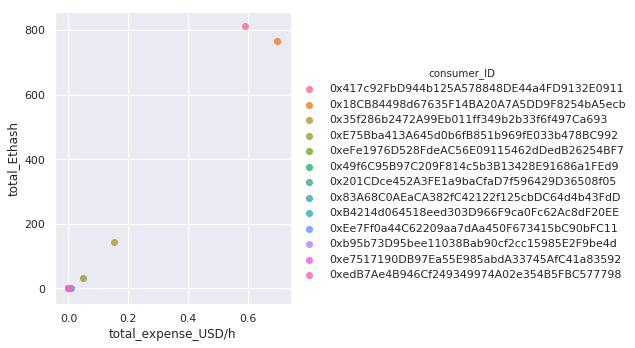

In [310]:
sns.lmplot( y="total_Ethash", x="total_expense_USD/h", data=df11, fit_reg=False, hue='consumer_ID', legend=True)

# Connor's deals

In [311]:
df[df.consumer_ID == '0x417c92FbD944b125A578848DE44a4FD9132E0911']

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,consumer_ID,supplier_ID,price_USD/h,Ethash,master_ID
0,"{""deals"":[{""deal"":{""id"":""6390""","""benchmarks"":{""values"":[103",1300,2,512000000,67108864,1000000,1000000,7,8511291392,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ND...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,0.136195,186.283,0x416Af57F633e292b25976573a460d7C3200feD34
1,"{""deal"":{""id"":""6421""","""benchmarks"":{""values"":[104",1943,16,512000000,67108864,1000000,1000000,4,6372196352,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NG...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xA0885038D127f628B3DC7f406004dE104d0bF496,0.056235,79.298,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA
5,"{""deal"":{""id"":""6388""","""benchmarks"":{""values"":[108",998,2,512000000,67108864,1000000,1000000,6,8050442240,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4RT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x4FC67349467228BF3e57A8eaAf135D93C3558239,0.125369,173.183,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD
11,"{""deal"":{""id"":""6384""","""benchmarks"":{""values"":[108",990,2,512000000,67108864,1000000,1000001,6,8106123264,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4RT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,0.125533,172.031,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD
16,"{""deal"":{""id"":""6404""","""benchmarks"":{""values"":[107",1426,4,512000000,67108864,1000002,1000000,1,8513388544,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Nz...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xEEBc720552B116A8C3bAF4AaeCf762A45254814a,0.019184,26.665,0x7610dd9944615263d9858101Dd197C90255DBa93
18,"{""deal"":{""id"":""6345""","""benchmarks"":{""values"":[102",1327,4,512000000,67108864,1000000,1000001,1,6371147776,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NG...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x8A9e1C48E12a4288B29b8709603f9202e64b4745,0.014317,19.874,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA
20,"{""deal"":{""id"":""6291""","""benchmarks"":{""values"":[108",1113,8,512000000,67108864,1000000,1000000,1,6368002048,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Nk...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x734C2a165e57496169aAAEA6E22aE763fF8d7654,0.014201,19.778,0x6F6B9a47668D96b3758D79c67c30A290934a759F
22,"{""deal"":{""id"":""6326""","""benchmarks"":{""values"":[108",998,2,512000000,67108864,1000000,1000000,1,4285816832,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x4023A8e997C09f97DA89aaB99AC7C5A93A9d1c49,0.016030,22.428,0x257308430e87b7E45816Bda27DC76cbF739fCD30
28,"{""deal"":{""id"":""6422""","""benchmarks"":{""values"":[103",1300,4,512000000,67108864,1000000,1000000,1,6368002048,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4QU...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.015160,21.959,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01
3

In [312]:
df12 = df[df.consumer_ID == '0x417c92FbD944b125A578848DE44a4FD9132E0911']

In [313]:
df12 = df12.sort_values(['Ethash', 'price_USD/h'], ascending = False)

In [314]:
df12[['consumer_ID', 'supplier_ID', 'master_ID', 'price_USD/h', 'Ethash',0]]

,consumer_ID,supplier_ID,master_ID,price_USD/h,Ethash,0
0,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,0x416Af57F633e292b25976573a460d7C3200feD34,0.136195,186.283,"{""deals"":[{""deal"":{""id"":""6390"""
5,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x4FC67349467228BF3e57A8eaAf135D93C3558239,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,0.125369,173.183,"{""deal"":{""id"":""6388"""
11,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,0.125533,172.031,"{""deal"":{""id"":""6384"""
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xA0885038D127f628B3DC7f406004dE104d0bF496,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0.056235,79.298,"{""deal"":{""id"":""6421"""
33,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x47012859fC5cB44d6106D54ff77580c85C380ecc,0x25158E6f8dD683d222E3785BA2294A319489084E,0.035774,48.544,"{""deal"":{""id"":""6330"""
16,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xEEBc720552B116A8C3bAF4AaeCf762A45254814a,0x7610dd9944615263d9858101Dd197C90255DBa93,0.019184,26.665,"{""deal"":{""id"":""6404"""
32,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x4023A8e997C09f97DA89aaB99AC7C5A93A9d1c49,0x257308430e87b7E45816Bda27DC76cbF739fCD30,0.016394,22.519,"{""deal"":{""id"":""6323"""
22,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x4023A8e997C09f97DA89aaB99AC7C5A93A9d1c49,0x257308430e87b7E45816Bda27DC76cbF739fCD30,0.016030,22.428,"{""deal"":{""id"":""6326"""
28,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,0.015160,21.959,"{""deal"":{""id"":""6422"""
18,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x8A9e1C48E12a4288B29b8709603f9202e64b4745,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0.014317,19.874,"{""deal"":{""id"":""6345"""


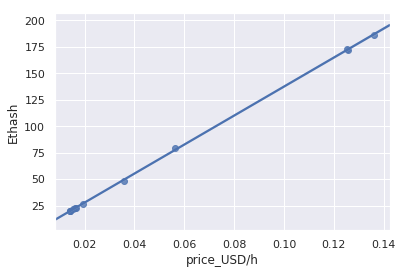

In [315]:
sns.regplot( y="Ethash", x="price_USD/h", data=df12)

In [316]:
from scipy import stats

In [317]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df12.Ethash,df12['price_USD/h'])

In [318]:
slope

0.00072974816579122819

In [319]:
print("Current profitability (USD/h) = " + str(slope) + " * Ethash(Mh/s)")

Current profitability (USD/h) = 0.000729748165791 * Ethash(Mh/s)


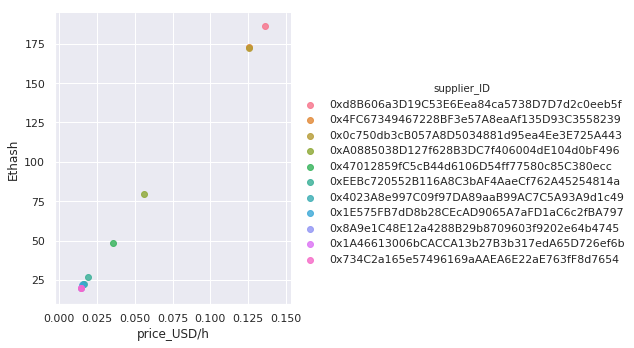

In [320]:
sns.lmplot( y="Ethash", x="price_USD/h", data=df12, fit_reg=False, hue='supplier_ID', legend=True)

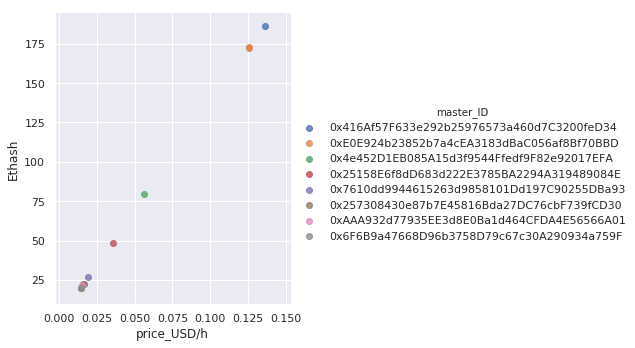

In [321]:
sns.lmplot( y="Ethash", x="price_USD/h", data=df12, fit_reg=False, hue='master_ID', legend=True)

In [322]:
0.194853 * 1.05

0.20459565000000002

# Conclusions

In [325]:
print('Real-time total Ethash rate of the entire SONM platform is '+ str(df13['total_Ethash'].sum()) +' Mh/s.')

print('At this moment, total ' + str("{:.2f}".format(df13['total_revenue_USD/d'].sum())) + ' USD/day are spent on the entire SONM platform.')

print('Connor currently has '+ str(len(df12)) + ' deals.')

print('Connor currently pays ' + str("{:.2f}".format(df12['price_USD/h'].sum()*24)) + " USD/day.") 

print('Connor currently mines ETH with ' + str(df12['Ethash'].sum()) + ' Mh/s hashrate.')

print('There are '+ str(len(df23))+ ' unique suppliers at this moment.')

print('There are ' + str(len(df23[df23['total_Ethash']>0])) + ' unique GPU sppliers at this moment.')

print('There are ' + str(len(df23)-len(df23[df23['total_Ethash']>0])) + ' unique CPU sppliers at this moment.')

print('There are '+ str(len(df11))+ ' unique consumers at this moment.')

print('Currenlty, there are total '+ str(len(df)) + ' deals.')

print('Of which ' + str(len(df[df.Ethash>0])) + ' deals contain GPU.')

print('And ' + str(len(df[df.Ethash==0])) + ' deals are CPU only.')


Real-time total Ethash rate of the entire SONM platform is 1751.297 Mh/s.
At this moment, total 36.06 USD/day are spent on the entire SONM platform.
Connor currently has 12 deals.
Connor currently pays 14.12 USD/day.
Connor currently mines ETH with 812.368 Mh/s hashrate.
There are 23 unique suppliers at this moment.
There are 10 unique GPU sppliers at this moment.
There are 13 unique CPU sppliers at this moment.
There are 13 unique consumers at this moment.
Currenlty, there are total 42 deals.
Of which 18 deals contain GPU.
And 24 deals are CPU only.


# profitablility calculator

GPU card  EThash  SONM profitability
Nvida GTX 1050 TI   15 Mh/s  0.0127 USD/h 
Nvida GTX 1060    24 Mh/s  0.0201 USD/h
Nvida GTX 1070 TI   32 Mh/s  0.0274 USD/h
Nvida GTX 1080    27 Mh/s  0.0231 USD/h
Nvida GTX 1080 TI   37 Mh/s  0.0317 USD/h
Nvida GTX TITAN   40 Mh/s  0.0343 USD/h
Nvida GTX 1080 (with Pill) 40Mh/s 0.0343 USD/h
Nvida GTX 1080 TI (with Pill) 50 Mh/s 0.0429 USD/h

In [327]:
print("Current profitability (USD/h) = " + str(slope) + " * Ethash(Mh/s)")
print(" ")
print("GPU card                EThash     SONM profitability")
print("Nvida GTX 1050 TI       15 Mh/s    " + str("{:.2f}".format(slope*15*24))+ " USD/day")
print("Nvida GTX 1060          24 Mh/s    " + str("{:.2f}".format(slope*24*24))+ " USD/day")
print("Nvida GTX 1070 TI       32 Mh/s    " + str("{:.2f}".format(slope*32*24))+ " USD/day")
print("Nvida GTX 1080          27 Mh/s    " + str("{:.2f}".format(slope*27*24))+ " USD/day")
print("Nvida GTX 1080 TI       37 Mh/s    " + str("{:.2f}".format(slope*37*24))+ " USD/day")
print("Nvida GTX TITAN         40 Mh/s    " + str("{:.2f}".format(slope*40*24))+ " USD/day")
print("Nvida GTX 1080 +pill    40 Mh/s    " + str("{:.2f}".format(slope*40*24))+ " USD/day")
print("Nvida GTX 1080 TI +pill 50 Mh/s    " + str("{:.2f}".format(slope*50*24))+ " USD/day")






Current profitability (USD/h) = 0.000729748165791 * Ethash(Mh/s)
 
GPU card                EThash     SONM profitability
Nvida GTX 1050 TI       15 Mh/s    0.26 USD/day
Nvida GTX 1060          24 Mh/s    0.42 USD/day
Nvida GTX 1070 TI       32 Mh/s    0.56 USD/day
Nvida GTX 1080          27 Mh/s    0.47 USD/day
Nvida GTX 1080 TI       37 Mh/s    0.65 USD/day
Nvida GTX TITAN         40 Mh/s    0.70 USD/day
Nvida GTX 1080 +pill    40 Mh/s    0.70 USD/day
Nvida GTX 1080 TI +pill 50 Mh/s    0.88 USD/day


# My deals

0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb

In [229]:
df[df.consumer_ID == '0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb']

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,consumer_ID,supplier_ID,price_USD/h,Ethash,master_ID
6,"{""deal"":{""id"":""3462""","""benchmarks"":{""values"":[2003",538,8,256000000,67108864,1000000,1000000,0,0,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x7Cc1C96E6c20D6265531196d9ca2b3199fF8Ef9E,0.000010,0.000,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3
9,"{""deal"":{""id"":""3457""","""benchmarks"":{""values"":[1004",513,6,256000000,67108864,1000000,1000000,0,0,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x8546601F9b4AcF1dc99C72cc48ED243d119cca95,0.000100,0.000,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3
11,"{""deal"":{""id"":""3458""","""benchmarks"":{""values"":[1002",538,8,256000000,67108864,1000000,1000000,0,0,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x7Cc1C96E6c20D6265531196d9ca2b3199fF8Ef9E,0.000100,0.000,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3
15,"{""deal"":{""id"":""6306""","""benchmarks"":{""values"":[102",1145,2,512000000,67108864,1000000,1000000,6,4238344192,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,0.164621,205.768,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE
16,"{""deal"":{""id"":""2040""","""benchmarks"":{""values"":[824",788,1,800000000,10000000000,500000000,300000000,0,0,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xaE7DB91DeC00E3Be062C7dC33288597DF023e0d6,0.000480,0.000,0xf5c532D26cA0394822C1052989bfD36Dc3931ede
21,"{""deal"":{""id"":""5756""","""benchmarks"":{""values"":[105",1300,2,512000000,67108864,1000000,1000000,7,8513388544,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ND...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x672Ee945a55327328472B1a02437293945157f4C,0.175356,186.411,0x416Af57F633e292b25976573a460d7C3200feD34
24,"{""deal"":{""id"":""5342""","""benchmarks"":{""values"":[117",1301,2,512000000,67108864,1000000,1000000,7,8513388544,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ND...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,0.178736,186.366,0x416Af57F633e292b25976573a460d7C3200feD34
29,"{""deal"":{""id"":""3471""","""benchmarks"":{""values"":[1004",513,6,256000000,67108864,1000000,1000000,0,0,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x8546601F9b4AcF1dc99C72cc48ED243d119cca95,0.000010,0.000,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3
31,"{""deal"":{""id"":""5340""","""benchmarks"":{""values"":[118",1302,2,512000000,67108864,1000000,1000000,7,8513388544,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ND...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x62F5A3B4E867a9AB981201EbFA9A6FEA8dc22007,0.177844,186.198,0x416Af57F633e292b25976573a460d7C3200feD34
35,"{""deal"":{""id"":""3469""","""benchmarks"":{""values"":[1002",538,8,256000000,67108864,1000000,1000000,0,0,...,"""askIdentityLevel"":1","""bidI

In [230]:
df32 = df[df.consumer_ID == '0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb']

In [231]:
df32 = df32.sort_values(['Ethash', 'price_USD/h'], ascending = False)

In [232]:
df32[['consumer_ID', 'supplier_ID', 'master_ID', 'price_USD/h', 'Ethash',0]]

,consumer_ID,supplier_ID,master_ID,price_USD/h,Ethash,0
15,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,0.164621,205.768,"{""deal"":{""id"":""6306"""
21,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x672Ee945a55327328472B1a02437293945157f4C,0x416Af57F633e292b25976573a460d7C3200feD34,0.175356,186.411,"{""deal"":{""id"":""5756"""
24,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,0x416Af57F633e292b25976573a460d7C3200feD34,0.178736,186.366,"{""deal"":{""id"":""5342"""
31,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x62F5A3B4E867a9AB981201EbFA9A6FEA8dc22007,0x416Af57F633e292b25976573a460d7C3200feD34,0.177844,186.198,"{""deal"":{""id"":""5340"""
16,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xaE7DB91DeC00E3Be062C7dC33288597DF023e0d6,0xf5c532D26cA0394822C1052989bfD36Dc3931ede,0.000480,0.000,"{""deal"":{""id"":""2040"""
9,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x8546601F9b4AcF1dc99C72cc48ED243d119cca95,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.000100,0.000,"{""deal"":{""id"":""3457"""
11,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x7Cc1C96E6c20D6265531196d9ca2b3199fF8Ef9E,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.000100,0.000,"{""deal"":{""id"":""3458"""
36,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xAebD07A536C40041F2D91DE2E339725FdFCdB12E,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,0.000100,0.000,"{""deal"":{""id"":""5889"""
6,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x7Cc1C96E6c20D6265531196d9ca2b3199fF8Ef9E,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.000010,0.000,"{""deal"":{""id"":""3462"""
29,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x8546601F9b4AcF1dc99C72cc48ED243d119cca95,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.000010,0.000,"{""deal"":{""id"":""3471"""


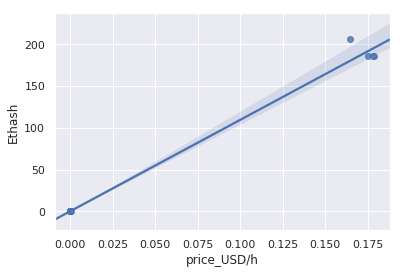

In [233]:
sns.regplot( y="Ethash", x="price_USD/h", data=df32)

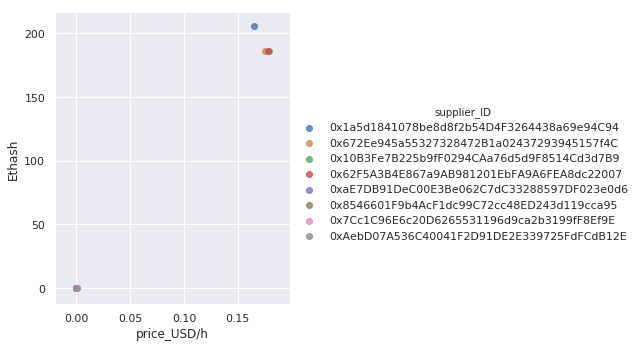

In [234]:
sns.lmplot( y="Ethash", x="price_USD/h", data=df32, fit_reg=False, hue='supplier_ID', legend=True)

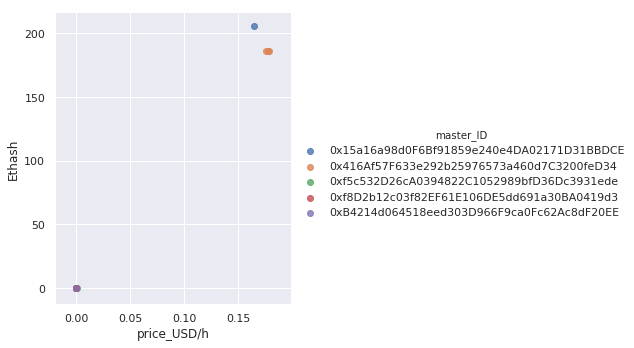

In [235]:
sns.lmplot( y="Ethash", x="price_USD/h", data=df32, fit_reg=False, hue='master_ID', legend=True)

0x416Af57F633e292b25976573a460d7C3200feD34

In [236]:
df[df.master_ID == '0x416Af57F633e292b25976573a460d7C3200feD34']

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,consumer_ID,supplier_ID,price_USD/h,Ethash,master_ID
3,"{""deal"":{""id"":""6038""","""benchmarks"":{""values"":[116",1300,2,512000000,67108864,1000000,1000000,7,8511291392,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ND...","""consumerCertificates"":""W10=""}",None,0xe7c4FA1BD62E425bB52eFFf88ddf3898a9A2187b,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,0.175373,186.283,0x416Af57F633e292b25976573a460d7C3200feD34
21,"{""deal"":{""id"":""5756""","""benchmarks"":{""values"":[105",1300,2,512000000,67108864,1000000,1000000,7,8513388544,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ND...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x672Ee945a55327328472B1a02437293945157f4C,0.175356,186.411,0x416Af57F633e292b25976573a460d7C3200feD34
24,"{""deal"":{""id"":""5342""","""benchmarks"":{""values"":[117",1301,2,512000000,67108864,1000000,1000000,7,8513388544,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ND...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,0.178736,186.366,0x416Af57F633e292b25976573a460d7C3200feD34
31,"{""deal"":{""id"":""5340""","""benchmarks"":{""values"":[118",1302,2,512000000,67108864,1000000,1000000,7,8513388544,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ND...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x62F5A3B4E867a9AB981201EbFA9A6FEA8dc22007,0.177844,186.198,0x416Af57F633e292b25976573a460d7C3200feD34


In [237]:
df[df.supplier_ID =='0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797']

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,consumer_ID,supplier_ID,price_USD/h,Ethash,master_ID


In [238]:
0.0574884648 *1.05

0.06036288804

In [239]:
0.060362889

0.060362889

In [115]:
0.1/125

0.0008

Current profitablility USD/h = 0.0008 * Ethash (Mh/s)